In [1]:
#Importing Packages
import numpy as np
from tinygp import kernels, GaussianProcess
import jax
from jax import random
import jax.numpy as jnp
import matplotlib.pyplot as plt
import arviz as az
from src.model_fitting_functions import run_inference
from src.examples_functions import plot_underlying_data,tinygp_2process_model

plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.linewidth'] = 0.4

rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)
jax.config.update("jax_enable_x64", True)

In [2]:
#Generating Underlying Process Data 
X = jnp.arange(0,120,0.1)
#Truth
GP = GaussianProcess(1 * kernels.ExpSquared(1),X,diag=1e-5,mean=1.0)
#Bias
GP2 = GaussianProcess(1 * kernels.ExpSquared(5),X,diag=1e-5,mean=-1.0)

mask = np.ones(len(X),dtype='bool')
mask[slice(int(len(X)/3),int(len(X)*2/3))]=False

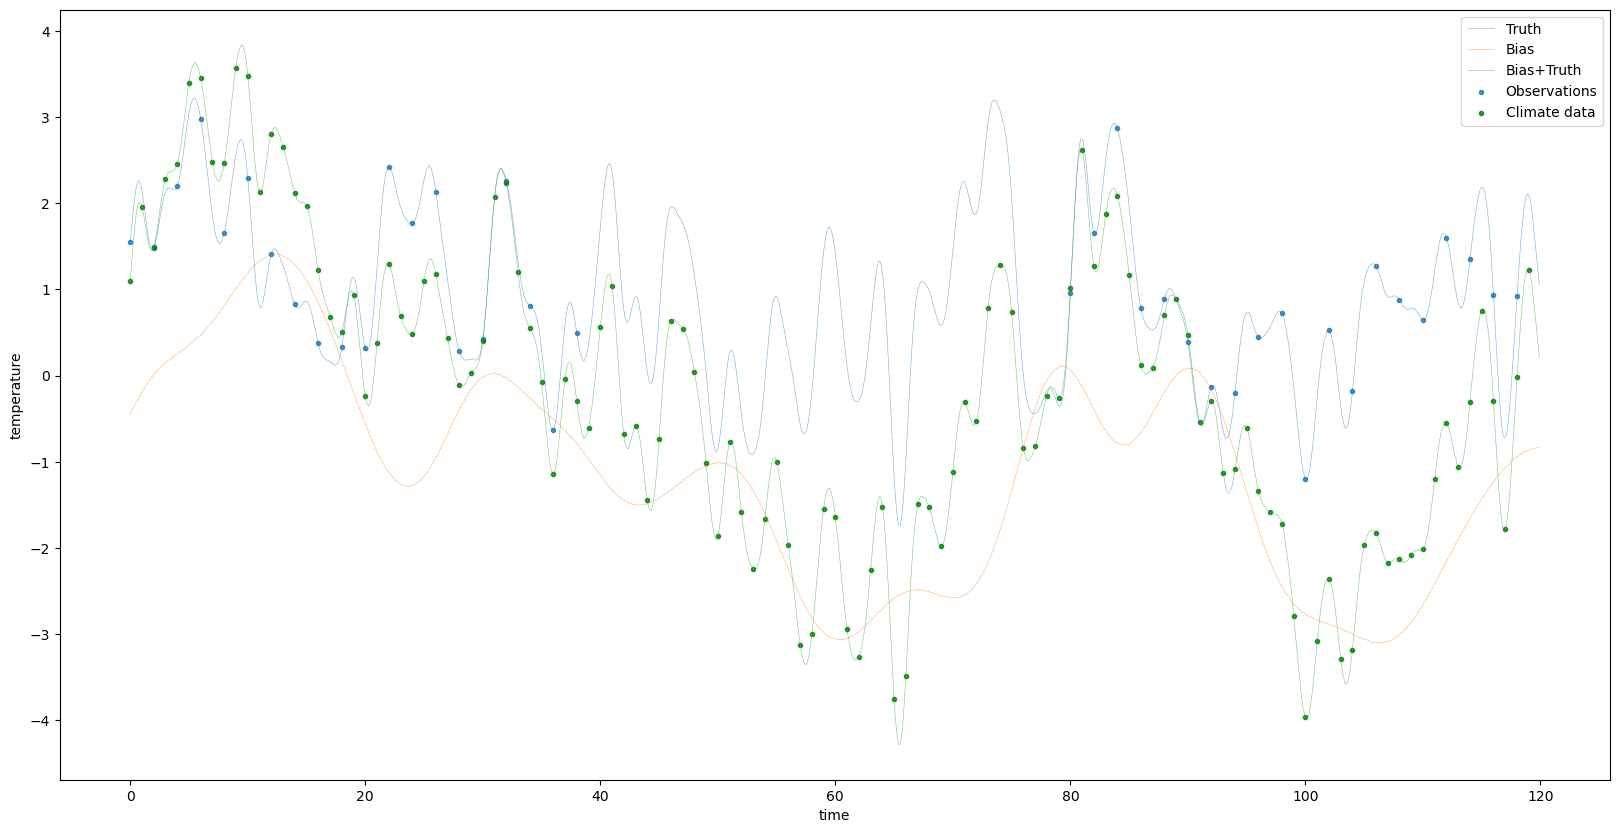

sample: 100%|██████████| 3000/3000 [00:59<00:00, 50.28it/s, 7 steps of size 5.31e-01. acc. prob=0.91] 



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
     bkern_var      4.22      2.13      3.69      1.31      7.21   1733.46      1.00
  blengthscale     10.53      2.13     10.36      7.37     14.30   1879.24      1.00
         bmean     -0.92      0.81     -0.93     -2.28      0.43   1942.02      1.00
      kern_var      0.83      0.12      0.82      0.63      1.02   1998.66      1.00
   lengthscale      0.95      0.04      0.95      0.88      1.03   2050.90      1.00
          mean      1.00      0.16      0.99      0.72      1.25   2383.95      1.00

Number of divergences: 0
Time Taken: 60.535806339234114


Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bkern_var,4.220,2.127,1.295,8.450,0.051,0.038,1828.0,1815.0,NaN
blengthscale,10.526,2.135,6.652,14.884,0.049,0.035,1846.0,1217.0,NaN
bmean,-0.917,0.814,-2.474,0.809,0.018,0.015,1977.0,1280.0,NaN
kern_var,0.831,0.123,0.577,1.048,0.003,0.002,2211.0,1296.0,NaN
lengthscale,0.949,0.044,0.860,1.036,0.001,0.001,2082.0,1392.0,NaN
mean,0.997,0.164,0.698,1.324,0.003,0.002,2428.0,1234.0,NaN


In [6]:
Y = GP.sample(rng_key)
Y2 = GP2.sample(rng_key)

ox = X[mask][::20]
odata = Y[mask][::20]
cx = X[::10] 
cdata = (Y+Y2)[::10] 

plot_underlying_data(X,Y,Y2,ox,odata,cx,cdata,(20,10))
plt.show()
mcmc_2process = run_inference(tinygp_2process_model, rng_key_, 1000, 2000, cx,ox=ox,cdata=cdata,odata=odata)
idata_test = az.from_numpyro(mcmc_2process)
az.summary(idata_test,hdi_prob=0.95)

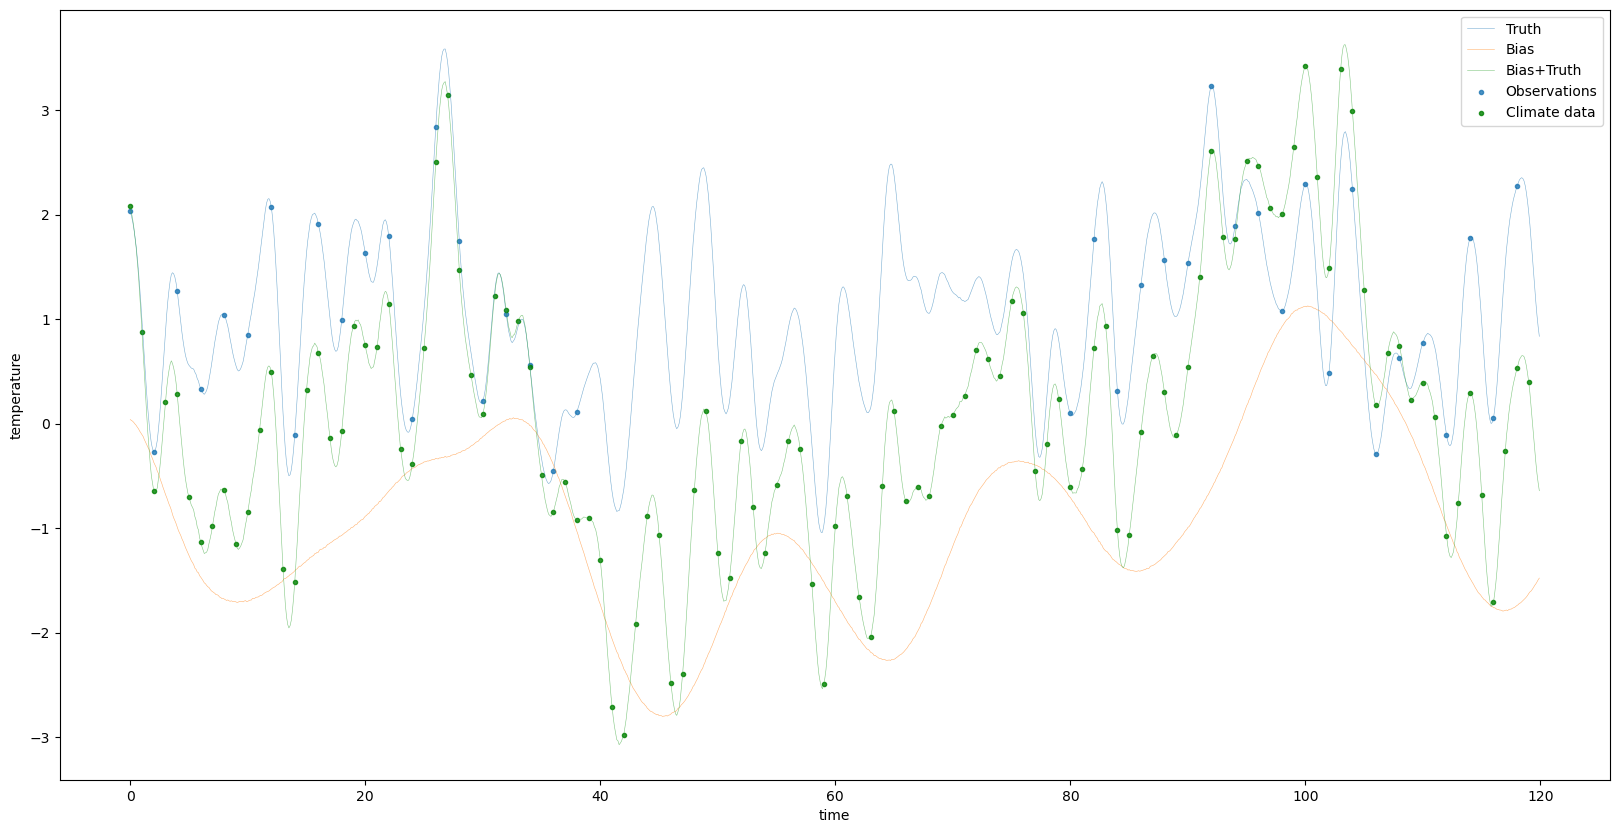

sample: 100%|██████████| 3000/3000 [01:01<00:00, 48.47it/s, 7 steps of size 4.94e-01. acc. prob=0.91] 



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
     bkern_var      2.72      1.54      2.36      0.70      4.82   1730.88      1.00
  blengthscale      8.49      1.93      8.31      5.45     11.43   1855.05      1.00
         bmean     -0.81      0.64     -0.80     -1.77      0.31   1728.30      1.00
      kern_var      0.90      0.15      0.88      0.68      1.14   1604.43      1.00
   lengthscale      1.01      0.05      1.02      0.94      1.09   1636.01      1.00
          mean      1.10      0.17      1.10      0.83      1.39   2307.07      1.00

Number of divergences: 0
Time Taken: 62.66620064526796


Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bkern_var,2.721,1.543,0.539,5.727,0.037,0.026,1575.0,1261.0,NaN
blengthscale,8.495,1.926,5.002,12.212,0.045,0.034,2014.0,1284.0,NaN
bmean,-0.811,0.639,-2.104,0.368,0.015,0.012,1737.0,1397.0,NaN
kern_var,0.900,0.146,0.639,1.188,0.004,0.003,1680.0,1600.0,NaN
lengthscale,1.015,0.049,0.923,1.111,0.001,0.001,1644.0,1600.0,NaN
mean,1.101,0.170,0.768,1.440,0.004,0.003,2322.0,1297.0,NaN


In [7]:
rng_key, rng_key_ = random.split(rng_key)
Y = GP.sample(rng_key)
Y2 = GP2.sample(rng_key)

ox = X[mask][::20]
odata = Y[mask][::20]
cx = X[::10] 
cdata = (Y+Y2)[::10] 

plot_underlying_data(X,Y,Y2,ox,odata,cx,cdata,(20,10))
plt.show()
mcmc_2process = run_inference(tinygp_2process_model, rng_key_, 1000, 2000, cx,ox=ox,cdata=cdata,odata=odata)
idata_test = az.from_numpyro(mcmc_2process)
az.summary(idata_test,hdi_prob=0.95)

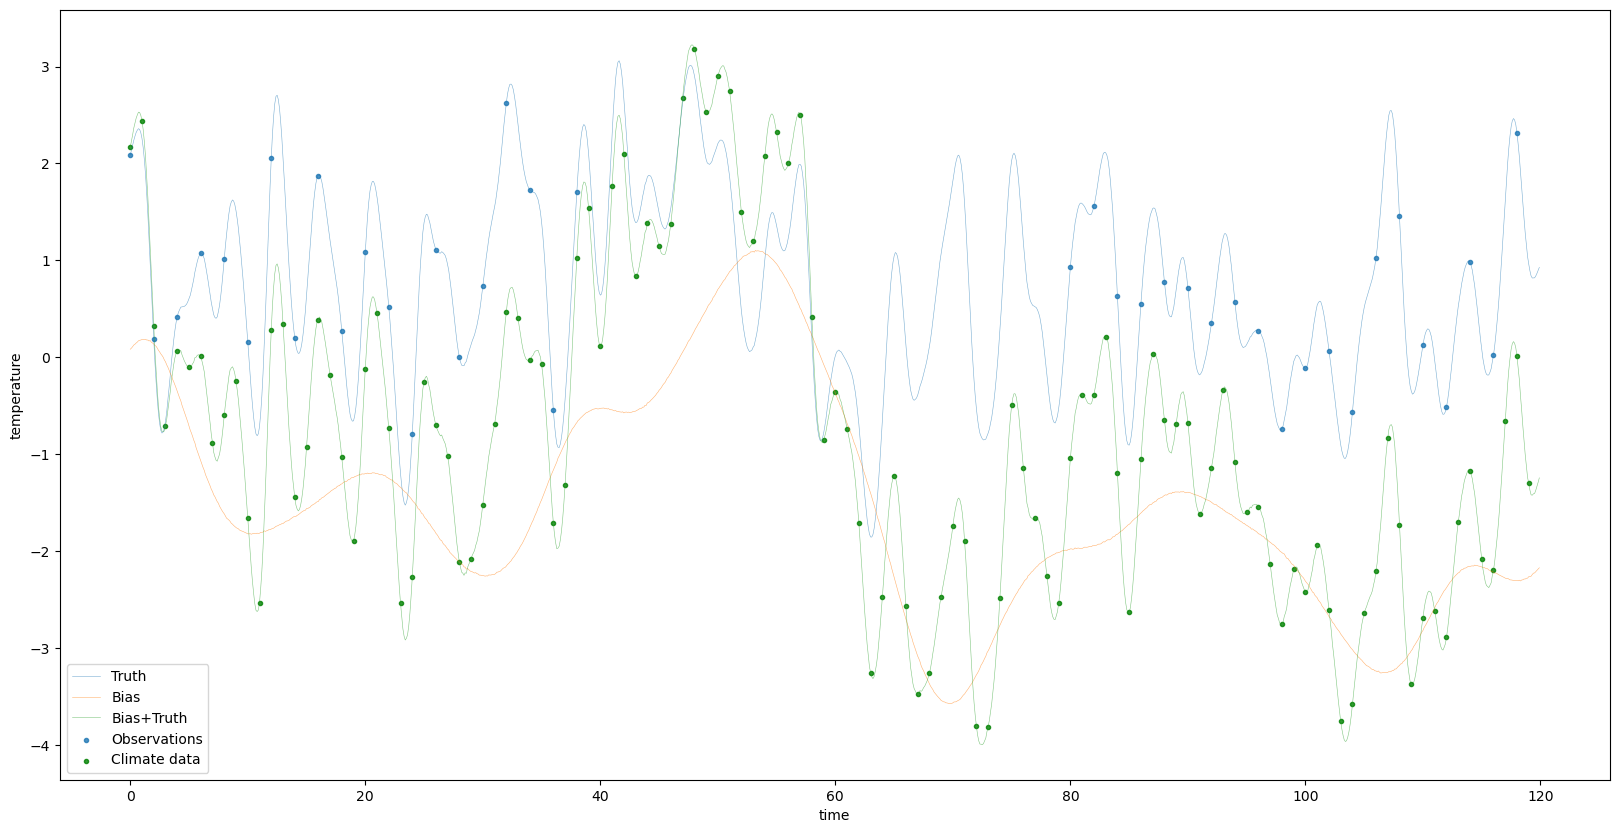

sample: 100%|██████████| 3000/3000 [00:57<00:00, 51.97it/s, 7 steps of size 4.95e-01. acc. prob=0.93] 



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
     bkern_var      4.01      2.02      3.60      1.19      6.88   1415.19      1.00
  blengthscale     10.31      2.07     10.24      7.04     13.85   1642.38      1.00
         bmean     -1.04      0.81     -1.07     -2.38      0.18   1665.86      1.00
      kern_var      0.97      0.15      0.96      0.74      1.22   1785.41      1.00
   lengthscale      0.95      0.05      0.95      0.87      1.03   1332.08      1.00
          mean      0.70      0.17      0.70      0.42      0.97   2130.07      1.00

Number of divergences: 0
Time Taken: 58.48301548138261


Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bkern_var,4.012,2.019,0.938,7.866,0.054,0.039,1534.0,1528.0,NaN
blengthscale,10.314,2.075,6.587,14.412,0.051,0.036,1598.0,1057.0,NaN
bmean,-1.041,0.810,-2.581,0.574,0.020,0.014,1765.0,1230.0,NaN
kern_var,0.974,0.154,0.705,1.286,0.004,0.003,1768.0,1551.0,NaN
lengthscale,0.948,0.049,0.847,1.037,0.001,0.001,1401.0,1031.0,NaN
mean,0.696,0.167,0.333,0.985,0.004,0.003,2138.0,1435.0,NaN


In [8]:
rng_key, rng_key_ = random.split(rng_key)
Y = GP.sample(rng_key)
Y2 = GP2.sample(rng_key)

ox = X[mask][::20]
odata = Y[mask][::20]
cx = X[::10] 
cdata = (Y+Y2)[::10] 

plot_underlying_data(X,Y,Y2,ox,odata,cx,cdata,(20,10))
plt.show()
mcmc_2process = run_inference(tinygp_2process_model, rng_key_, 1000, 2000, cx,ox=ox,cdata=cdata,odata=odata)
idata_test = az.from_numpyro(mcmc_2process)
az.summary(idata_test,hdi_prob=0.95)